In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
from scipy.special import expit

In [2]:
def function(x):
    nof=2
    nov=1
    sol=np.empty(nof)
    sol[0]=x**2
    sol[1]=(x-2)**2
    
    return sol

def res(x):
    status=True
    return status

xmax=np.array([2.5])
xmin=np.array([-2])

In [3]:
def isdomina(x_i, x_j):
    f_i=function(x_i)
    f_j=function(x_j)
    nof=f_j.size
    flagless=0
    flagequal=0
    aux=None
    for i in range(nof):
        if f_i[i]<f_j[i]:
            flagless=flagless+1
        elif f_j[i]==f_i[i]:
            flagequal=flagequal+1
    if flagless+flagequal ==nof and flagless>0: #se sim o domina o corrente
        aux=True
    else:
        aux=False
    return aux

In [4]:
def iarch(HL, SL, nov):
    x_j=np.empty([nov])
    archive=np.empty([0,nov])
    x_i=np.random.rand(nov)
    lines=0
    r=0
    while lines<(SL*2):
        for i in range(0,nov):
            x_j[i]=np.random.uniform(low=xmin[i], high=xmax[i], size=None)
        if (res(x_j)) and isdomina(x_i, x_j) or r>20 :
            archive=np.vstack([archive, x_j])
            r=0
            lines=lines+1
        else:
            r= r+1
    #hill climbing em torno de 20 no artigo diz que deve ser
    iteraction=archive.shape[0]
    cont=0
    while cont<iteraction:
        x_i=archive[cont]
        for jj in range(archive.shape[0]):
            if cont != jj:
                if isdomina(x_i,archive[jj]):
                    archive[jj]=newsol(archive[jj])
        cont=cont+1
    return archive

In [5]:
def newsol(x_i):
    nov=x_i.size
    x_j=np.zeros(nov)
    es=0
    while es==0:
        ind=np.random.randint(0,nov, size=None)
        rand=np.random.rand()
        b=0.2
        if rand-0.5<0:
            delta=b*math.log(1-2*math.fabs(rand-0.5))
        else:
            delta=-b*math.log(1-2*math.fabs(rand-0.5))

        for j in range(0,nov):
            if j!=ind:
                x_j[j]=x_i[j]
            else:
                x_j[j]=x_i[j]+delta
                if x_j[j]>xmax[j]:
                    x_j[j]=xmax[j]
                if x_j[j]<xmin[j]:
                    x_j[j]=xmin[j]
        if res(x_j):
            es=1
        else:
            es=0
    return x_j

[0.5301357]
[0.85447579]


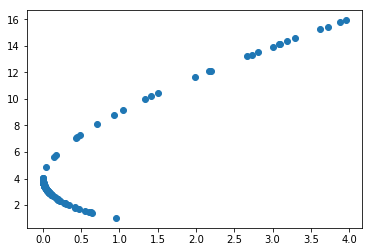

In [6]:
archive=iarch(50,80,1)
sol=np.empty([archive.shape[0], 2])
#print(archive)
for i in range(archive.shape[0]):
    sol[i]=function(archive[i])
#print(sol) 
f1, f2=sol.T
plt.scatter(f1,f2)
xj=newsol(archive[2])
print(archive[2])
print(xj)

In [7]:
def plotf(archive,nof,repeat):
    lines=archive.shape[0]
    nov=archive.shape[1]
    evalu=np.empty([lines, nof])
    for i in range(0,lines):
        evalu[i]=function(archive[i])
    ff1, ff2=evalu.T
    plt.scatter(ff1, ff2)
    plt.grid(b=None, color='grey', which='major', axis='both')
    plt.xlabel("f1(x)", fontsize=13, fontweight='bold')
    plt.ylabel("f2(x)", fontsize=13, fontweight='bold')
    #plt.title("Frente de pareto", fontsize=15, fontweight='bold')
    nome="Coannealing-"+str(repeat)+".pdf"
    np.savetxt("Coannealing-archive-"+str(repeat), archive, delimiter=" ")
    np.savetxt("Coannealing-sol-"+str(repeat), evalu, delimiter=" ")
    plt.savefig(nome, format='pdf', depi=600)
    plt.show()

In [8]:
def maxmin(sol):
    nof=sol.shape[1]
    R=np.empty(nof)
    for i in range(0,nof):
        R[i]=max(sol[i])-min(sol[i])
    return R 

In [9]:
def clust(size, archive):
    nof=archive.shape[1]
    while archive.shape[0]>size:
        linhas=archive.shape[0]
        mm=np.empty(linhas)
        deli=0
        for u in range(1,linhas):
            mm[u-1]=np.sqrt((archive[u-1][0]-archive[u][0])**2+(archive[u-1][1]-archive[u][1])**2)
        diff=800
        ind=0
        for i in range(0, mm.size):
            if mm[i]<diff:
                diff=mm[i]
                ind=i
        #ind=np.argmin(mm)
        if ind!=0 and ind!=(mm.size-1):
            if mm[ind+1]<= mm[ind-1]:
                deli=ind+1
            elif mm[ind-1]<=mm[ind+1]:
                deli=ind
        elif ind==(mm.size-1):
            #lista=np.append(lista, ind-1)
            deli=ind-1
        else:
            #lista=np.append(lista, ind+1)
            deli=ind+1  
        archive=np.delete(archive, deli, axis=0)   
            
    return archive

In [10]:
def delws(archive, sol, nof):
    nov=archive.shape[1]
    newarchive=np.empty([0,nov])
    size=archive.shape[0]
    lines=0
    flag=np.empty(archive.shape[0])
    #sol=np.empty([archive.shape[0], nof])
    #for i in range(archive.shape[0]):
        #sol[i]=function(archive[i])
    while lines<size:
        cont=0
        for i in range(0,size): 
            if lines != i:
                k=0
                for col in range(0,nof): #verifica se é dominado ou não
                    if sol[lines][col]<sol[i][col]:
                        cont=cont+1
                    else:
                        k=k+1
                if k==2:
                    flag[lines]=False
                    cont=cont+1
                    break
                else: 
                    flag[lines]=True
        lines=lines+1
    for l in range(archive.shape[0]):
        if flag[l]:
             newarchive=np.vstack([newarchive, archive[l]])
    return newarchive

In [11]:
def inc(x, archive):
    aux=None
    for i in range(archive.shape[0]):
        j=0
        for col in range(0,archive.shape[1]):
            if x[col] == archive[i][col]:
                j=j+1
        if j == archive.shape[1]:
            aux = True
            break
        else:
            aux=False
            
    return aux

In [12]:
def maxdom(sola, solarchive, nof,R):
    dom=np.empty(0)
    aux=0
    for i in range(solarchive.shape[0]):
        if sola[0]!=solarchive[i][0] and sola[1]!=solarchive[i][1]:
            aux=(sola[0]-solarchive[i][0])*R[0]*(sola[1]-solarchive[i][1])*R[1]
            #dom=np.append(dom, aux)
        dom=np.append(dom, aux)
    return np.amax(dom)

In [13]:
def coannealing(Tmax, Tmin, N, alpha, SL, HL, nof, nov):
    archive=iarch(HL, SL, nov)
    #archive=reo(archive,nof)
    ale=np.random.choice(np.arange(archive.shape[0]))
    x_i=archive[ale]
    temp=Tmax
    r=0
    max_r=5
    while temp>Tmin:
        for ciclo in range(N):
            x_j=newsol(x_i)
            solarchive=np.zeros([archive.shape[0],nof])
            soli=function(x_i)
            solj=function(x_j)
            for i in range(archive.shape[0]):
                solarchive[i]=function(archive[i])
            R=maxmin(solarchive)
            deltaE=maxdom(solj, solarchive, nof, R)-maxdom(soli, solarchive, nof, R)
            p=np.random.rand()
            prob=expit(-deltaE/temp)
            if deltaE<=0 or p<prob:
                #print("valor", deltaE)
                x_i=x_j
                soli=solj
                aux=maxdom(solj,solarchive,nof,R)
                #print("aux=",aux)
                if aux<=0.5:
                    #print("adicionado")
                    archive=np.vstack([archive, x_j])
                    solarchive=np.vstack([solarchive, solj])
                    if archive.shape[0]>HL:
                        #print("clusterizado")
                        archive=delws(archive, solarchive, nof)
                        #archive=clust(HL, archive)
                        if inc(x_i,archive):
                            if r<max_r:
                                archive=np.vstack([archive, x_i])
                            else:
                                ale=np.random.choice(np.arange(archive.shape[0]))
                                x_i=archive[ale]
                                r=r+1
                        else:
                            r=0
        temp=temp*alpha
    return archive

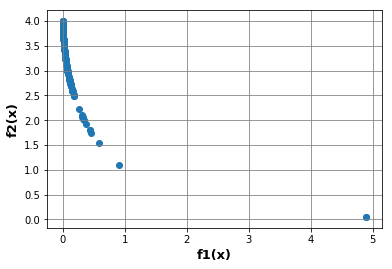

CPU times: user 58.6 s, sys: 151 ms, total: 58.7 s
Wall time: 58.8 s


In [14]:
%%time
repeat=1
cputime=np.zeros([repeat,2])
for i in range(repeat):
    Tmax=100
    Tmin=0.1
    N=100
    alpha=0.85
    HL=50
    SL=100
    nof=2
    nov=1
    start=time.time()
    archive1=coannealing(Tmax,Tmin,N,alpha,SL,HL,nof,nov)
    end=time.time()
    plotf(archive1,nof, i)
    cputime[i][0]=end-start
    cputime[i][1]=cputime[i][0]/60
#np.savetxt("tempo.csv", cputime, delimiter=",")